C:\Users\Xiaomi\AppData\Local\Programs\Python\Python310\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


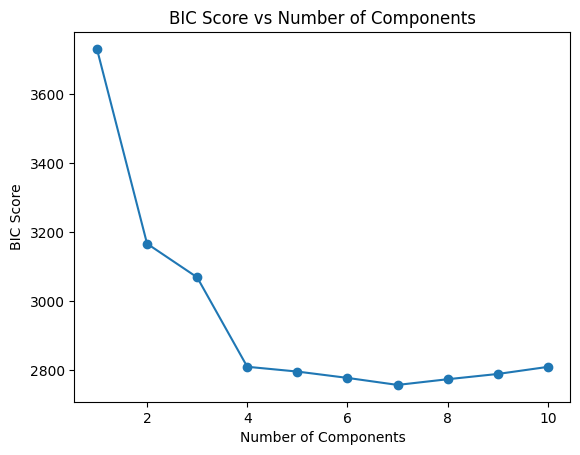

Optimal number of components: 7


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

data = pd.read_excel('zad5.xls')

# Извлечение данных из первого столбца
X = data.iloc[:, 0].values

# Масштабирование данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))

# Определение оптимального количества компонент смеси распределений
n_components = range(1, 11)
bic_scores = []

for n in n_components:
    gmm = GaussianMixture(n_components=n)
    gmm.fit(X_scaled)
    bic_scores.append(gmm.bic(X_scaled))

# Визуализация кривой BIC
plt.plot(n_components, bic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.title('BIC Score vs Number of Components')
plt.show()

# Определение количества компонент смеси распределений
optimal_n_components = np.argmin(bic_scores) + 1
print("Optimal number of components:", optimal_n_components)

# Декомпозиция смеси распределений
gmm = GaussianMixture(n_components=optimal_n_components)
gmm.fit(X_scaled.reshape(-1, 1))

# Получение оценок параметров каждого распределения
means = scaler.inverse_transform(gmm.means_)
covariances = scaler.inverse_transform(gmm.covariances_.reshape(-1, 1)).flatten()
weights = gmm.weights_




    




In [19]:
labels = gmm.predict(X_scaled.reshape(-1, 1))

# Вывод наблюдений и их соответствующего распределения
for observation, label in zip(X, labels):
    print(f"Observation: {observation}, Distribution: {label+1}")

Observation: 24.41, Distribution: 6
Observation: 15.47, Distribution: 6
Observation: 37.18, Distribution: 5
Observation: 24.14, Distribution: 6
Observation: 86.36, Distribution: 7
Observation: 114.62, Distribution: 4
Observation: 16.0, Distribution: 6
Observation: 93.76, Distribution: 1
Observation: 100.01, Distribution: 1
Observation: 9.06, Distribution: 2
Observation: 89.79, Distribution: 1
Observation: 89.76, Distribution: 1
Observation: 105.51, Distribution: 1
Observation: 18.1, Distribution: 6
Observation: 105.49, Distribution: 1
Observation: 99.55, Distribution: 1
Observation: 25.91, Distribution: 6
Observation: 107.02, Distribution: 1
Observation: 24.31, Distribution: 6
Observation: 72.46, Distribution: 7
Observation: 31.48, Distribution: 6
Observation: 102.9, Distribution: 1
Observation: 55.95, Distribution: 5
Observation: 96.64, Distribution: 1
Observation: 148.01, Distribution: 3
Observation: 13.23, Distribution: 2
Observation: 33.74, Distribution: 6
Observation: 22.63, Distr

In [20]:
# Вывод информации о каждом распределении
for i in range(optimal_n_components):
    print("Distribution", i+1)
    print("Mean:", means[i][0])
    print("Covariance:", covariances[i])
    print("Weight:", weights[i])
    print()

Distribution 1
Mean: 99.4642612403947
Covariance: 71.54980232938522
Weight: 0.3349820517090833

Distribution 2
Mean: 6.4132661811720055
Covariance: 71.52846783919455
Weight: 0.16690429678627464

Distribution 3
Mean: 140.0557637341886
Covariance: 72.96446485357733
Weight: 0.07029974278245306

Distribution 4
Mean: 113.1356575256665
Covariance: 72.72653309214382
Weight: 0.09504146065012627

Distribution 5
Mean: 49.30329892065507
Covariance: 72.94878090698268
Weight: 0.09602980390100037

Distribution 6
Mean: 24.282948684010186
Covariance: 72.40033841956662
Weight: 0.13239687245520818

Distribution 7
Mean: 77.78612442219969
Covariance: 73.22238704165206
Weight: 0.10434577171585432



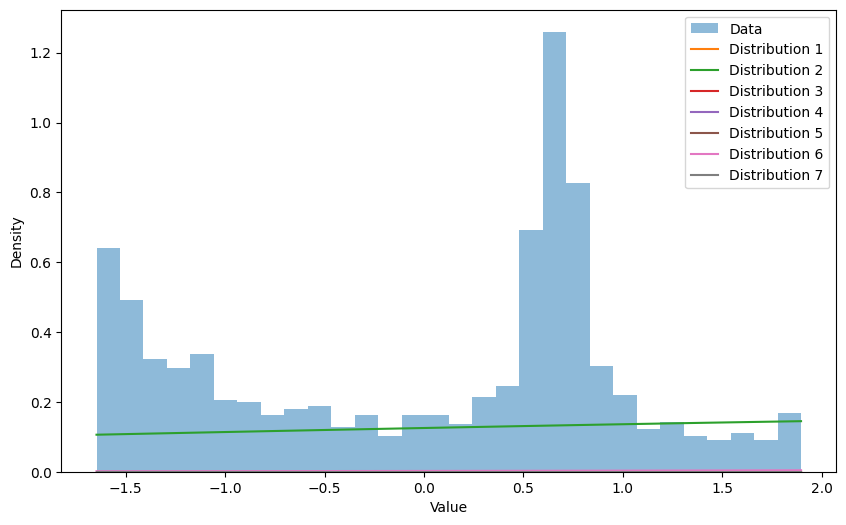

In [21]:
# Визуализация распределений
plt.figure(figsize=(10, 6))
plt.hist(X_scaled, bins=30, density=True, alpha=0.5, label='Data')

for i in range(optimal_n_components):
    x = np.linspace(X_scaled.min(), X_scaled.max(), 100)
    y = weights[i] * np.exp(-(x - means[i])**2 / (2 * covariances[i]))
    plt.plot(x, y, label=f'Distribution {i+1}')

plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()